In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics
import tensorflow as tf
import numpy as np 
from pathlib import Path, PurePath
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
def img_show(img):
    fig1 = plt.figure(figsize=(6,6), dpi=80)
    plt.imshow(img,origin='lower', cmap='YlGnBu', norm=LogNorm())
    plt.colorbar()
    fig1.savefig("Figure_1" + ".png", format='png',transparent=True)
    plt.show()

def load_single_class(class_title = None, downscale = True, autocrop = False):
    path = "sample1"
    class_files = []
    for f in listdir(join(path, class_title)):
        if f.endswith(".npy"):
            class_files.append(f)

    class_img_list = []
    for item in class_files:
        class_img = np.load(join(path,class_title,item))
        if downscale == True:
            class_img = downscale_local_mean(class_img, (20, 16))
        if autocrop == True:
            class_img = auto_crop(ori_img = class_img, dim = 30)

        class_img_list.append(class_img)

    return np.array(class_img_list)

In [4]:
x_1 = load_single_class(class_title = 'e-', downscale = True)
x_2 = load_single_class(class_title = 'mu+', downscale = True)
x_3 = load_single_class(class_title = 'p+', downscale = True)
x_4 = load_single_class(class_title = 'gamma', downscale = True)
x_5 = load_single_class(class_title = 'pi+', downscale = True)

In [5]:
x_1.shape,x_2.shape,x_3.shape,x_4.shape,x_5.shape

((100, 30, 30), (100, 30, 30), (100, 30, 30), (100, 30, 30), (100, 30, 30))

In [6]:
y_1=0*np.ones((100,1))
y_2=1*np.ones((100,1))
y_3=2*np.ones((100,1))
y_4=3*np.ones((100,1))
y_5=4*np.ones((100,1))

X=np.concatenate((x_1,x_2,x_3,x_4,x_5),axis=0)
Y=np.concatenate((y_1,y_2,y_3,y_4,y_5),axis=0)
print(X.shape,type(X))
print(Y.shape,type(Y))

(500, 30, 30) <class 'numpy.ndarray'>
(500, 1) <class 'numpy.ndarray'>


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

X_train=X_train.astype('float32')/np.amax(X)
X_test=X_test.astype('float32')/np.amax(X)
X_train = X_train.reshape((X_train.shape[0], 30, 30, 1))
X_test = X_test.reshape((X_test.shape[0], 30, 30, 1))
Y_train = to_categorical(Y_train)
Y_test= to_categorical(Y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(X_train[0].shape)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

opt = SGD(lr=0.0002, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
steps = int(X_train.shape[0] / 8)
history = model.fit(X_train, Y_train, shuffle=False , epochs=600, batch_size= 10, validation_split=0.2, verbose=1)
_ , acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/600
30/30 [==============================] - 1s 28ms/step - loss: 1.5986 - accuracy: 0.2094 - val_loss: 1.5889 - val_accuracy: 0.2267
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5943 - accuracy: 0.2239 - val_loss: 1.5851 - val_accuracy: 0.2400
Epoch 3/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5892 - accuracy: 0.2894 - val_loss: 1.5813 - val_accuracy: 0.2933
Epoch 4/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5841 - accuracy: 0.3359 - val_loss: 1.5774 - val_accuracy: 0.3467
Epoch 5/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5788 - accuracy: 0.3673 - val_loss: 1.5735 - val_accuracy: 0.3467
Epoch 6/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5735 - accuracy: 0.4057 - val_loss: 1.5693 - val_accuracy: 0.3600
Epoch 7/600
30/30 [==============================] - 0s 4ms/step - loss: 1.5681 - accuracy: 0.4260 - val_loss: 1.5651 - val_accuracy: 0.3733
Epoch 8/600


Epoch 59/600
30/30 [==============================] - 0s 4ms/step - loss: 1.3006 - accuracy: 0.5014 - val_loss: 1.3563 - val_accuracy: 0.4933
Epoch 60/600
30/30 [==============================] - 0s 3ms/step - loss: 1.2962 - accuracy: 0.5014 - val_loss: 1.3528 - val_accuracy: 0.4933
Epoch 61/600
30/30 [==============================] - 0s 4ms/step - loss: 1.2919 - accuracy: 0.5014 - val_loss: 1.3493 - val_accuracy: 0.5200
Epoch 62/600
30/30 [==============================] - 0s 3ms/step - loss: 1.2876 - accuracy: 0.4979 - val_loss: 1.3459 - val_accuracy: 0.5200
Epoch 63/600
30/30 [==============================] - 0s 3ms/step - loss: 1.2834 - accuracy: 0.4916 - val_loss: 1.3425 - val_accuracy: 0.5200
Epoch 64/600
30/30 [==============================] - 0s 3ms/step - loss: 1.2793 - accuracy: 0.4928 - val_loss: 1.3393 - val_accuracy: 0.5200
Epoch 65/600
30/30 [==============================] - 0s 4ms/step - loss: 1.2752 - accuracy: 0.4893 - val_loss: 1.3361 - val_accuracy: 0.5200
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 1.1197 - accuracy: 0.5244 - val_loss: 1.2176 - val_accuracy: 0.4800
Epoch 117/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1174 - accuracy: 0.5254 - val_loss: 1.2160 - val_accuracy: 0.4800
Epoch 118/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1151 - accuracy: 0.5254 - val_loss: 1.2143 - val_accuracy: 0.4800
Epoch 119/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1129 - accuracy: 0.5292 - val_loss: 1.2126 - val_accuracy: 0.4800
Epoch 120/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1108 - accuracy: 0.5348 - val_loss: 1.2110 - val_accuracy: 0.4800
Epoch 121/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1086 - accuracy: 0.5348 - val_loss: 1.2093 - val_accuracy: 0.4933
Epoch 122/600
30/30 [==============================] - 0s 3ms/step - loss: 1.1065 - accuracy: 0.5367 - val_loss: 1.2078 - val_accuracy: 0.4933
Epoch 123/600

30/30 [==============================] - 0s 4ms/step - loss: 1.0167 - accuracy: 0.5453 - val_loss: 1.1440 - val_accuracy: 0.5600
Epoch 174/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0151 - accuracy: 0.5453 - val_loss: 1.1429 - val_accuracy: 0.5600
Epoch 175/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0137 - accuracy: 0.5453 - val_loss: 1.1420 - val_accuracy: 0.5600
Epoch 176/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0123 - accuracy: 0.5453 - val_loss: 1.1410 - val_accuracy: 0.5600
Epoch 177/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0109 - accuracy: 0.5470 - val_loss: 1.1402 - val_accuracy: 0.5600
Epoch 178/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0096 - accuracy: 0.5512 - val_loss: 1.1392 - val_accuracy: 0.5600
Epoch 179/600
30/30 [==============================] - 0s 3ms/step - loss: 1.0082 - accuracy: 0.5487 - val_loss: 1.1382 - val_accuracy: 0.5600
Epoch 180/600

30/30 [==============================] - 0s 4ms/step - loss: 0.9478 - accuracy: 0.5669 - val_loss: 1.0978 - val_accuracy: 0.5600
Epoch 231/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9468 - accuracy: 0.5669 - val_loss: 1.0972 - val_accuracy: 0.5600
Epoch 232/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9458 - accuracy: 0.5669 - val_loss: 1.0965 - val_accuracy: 0.5600
Epoch 233/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9447 - accuracy: 0.5669 - val_loss: 1.0959 - val_accuracy: 0.5600
Epoch 234/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9437 - accuracy: 0.5669 - val_loss: 1.0952 - val_accuracy: 0.5600
Epoch 235/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9428 - accuracy: 0.5701 - val_loss: 1.0945 - val_accuracy: 0.5600
Epoch 236/600
30/30 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.5676 - val_loss: 1.0939 - val_accuracy: 0.5600
Epoch 237/600

30/30 [==============================] - 0s 4ms/step - loss: 0.8977 - accuracy: 0.6014 - val_loss: 1.0655 - val_accuracy: 0.5733
Epoch 288/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8970 - accuracy: 0.6014 - val_loss: 1.0649 - val_accuracy: 0.5733
Epoch 289/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8963 - accuracy: 0.6014 - val_loss: 1.0645 - val_accuracy: 0.5867
Epoch 290/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.6014 - val_loss: 1.0640 - val_accuracy: 0.5867
Epoch 291/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8948 - accuracy: 0.6014 - val_loss: 1.0635 - val_accuracy: 0.5867
Epoch 292/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8940 - accuracy: 0.6014 - val_loss: 1.0630 - val_accuracy: 0.5867
Epoch 293/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8933 - accuracy: 0.6049 - val_loss: 1.0626 - val_accuracy: 0.5867
Epoch 294/600

30/30 [==============================] - 0s 4ms/step - loss: 0.8584 - accuracy: 0.6152 - val_loss: 1.0392 - val_accuracy: 0.6267
Epoch 345/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8577 - accuracy: 0.6152 - val_loss: 1.0387 - val_accuracy: 0.6267
Epoch 346/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8572 - accuracy: 0.6152 - val_loss: 1.0383 - val_accuracy: 0.6267
Epoch 347/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8566 - accuracy: 0.6195 - val_loss: 1.0380 - val_accuracy: 0.6267
Epoch 348/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8559 - accuracy: 0.6195 - val_loss: 1.0374 - val_accuracy: 0.6267
Epoch 349/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8553 - accuracy: 0.6152 - val_loss: 1.0371 - val_accuracy: 0.6267
Epoch 350/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8547 - accuracy: 0.6237 - val_loss: 1.0366 - val_accuracy: 0.6400
Epoch 351/600

30/30 [==============================] - 0s 4ms/step - loss: 0.8258 - accuracy: 0.6395 - val_loss: 1.0174 - val_accuracy: 0.6667
Epoch 402/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6395 - val_loss: 1.0170 - val_accuracy: 0.6667
Epoch 403/600
30/30 [==============================] - 0s 4ms/step - loss: 0.8248 - accuracy: 0.6395 - val_loss: 1.0167 - val_accuracy: 0.6667
Epoch 404/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.6395 - val_loss: 1.0162 - val_accuracy: 0.6667
Epoch 405/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6395 - val_loss: 1.0159 - val_accuracy: 0.6667
Epoch 406/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.6395 - val_loss: 1.0156 - val_accuracy: 0.6667
Epoch 407/600
30/30 [==============================] - 0s 3ms/step - loss: 0.8225 - accuracy: 0.6395 - val_loss: 1.0152 - val_accuracy: 0.6667
Epoch 408/600

30/30 [==============================] - 0s 4ms/step - loss: 0.7962 - accuracy: 0.6448 - val_loss: 0.9993 - val_accuracy: 0.6667
Epoch 459/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7958 - accuracy: 0.6448 - val_loss: 0.9990 - val_accuracy: 0.6667
Epoch 460/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7952 - accuracy: 0.6483 - val_loss: 0.9988 - val_accuracy: 0.6667
Epoch 461/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7947 - accuracy: 0.6483 - val_loss: 0.9985 - val_accuracy: 0.6667
Epoch 462/600
30/30 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.6483 - val_loss: 0.9981 - val_accuracy: 0.6667
Epoch 463/600
30/30 [==============================] - 0s 3ms/step - loss: 0.7938 - accuracy: 0.6483 - val_loss: 0.9979 - val_accuracy: 0.6667
Epoch 464/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7932 - accuracy: 0.6483 - val_loss: 0.9975 - val_accuracy: 0.6667
Epoch 465/600

30/30 [==============================] - 0s 3ms/step - loss: 0.7686 - accuracy: 0.6780 - val_loss: 0.9836 - val_accuracy: 0.6933
Epoch 516/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7682 - accuracy: 0.6755 - val_loss: 0.9833 - val_accuracy: 0.6933
Epoch 517/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.6755 - val_loss: 0.9832 - val_accuracy: 0.6933
Epoch 518/600
30/30 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.6755 - val_loss: 0.9828 - val_accuracy: 0.6933
Epoch 519/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7668 - accuracy: 0.6755 - val_loss: 0.9825 - val_accuracy: 0.6933
Epoch 520/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7664 - accuracy: 0.6755 - val_loss: 0.9823 - val_accuracy: 0.6933
Epoch 521/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7659 - accuracy: 0.6755 - val_loss: 0.9821 - val_accuracy: 0.6933
Epoch 522/600

30/30 [==============================] - 0s 3ms/step - loss: 0.7428 - accuracy: 0.6853 - val_loss: 0.9704 - val_accuracy: 0.6800
Epoch 573/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7424 - accuracy: 0.6771 - val_loss: 0.9702 - val_accuracy: 0.6800
Epoch 574/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7419 - accuracy: 0.6853 - val_loss: 0.9700 - val_accuracy: 0.6800
Epoch 575/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7414 - accuracy: 0.6853 - val_loss: 0.9697 - val_accuracy: 0.6800
Epoch 576/600
30/30 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.6853 - val_loss: 0.9695 - val_accuracy: 0.6800
Epoch 577/600
30/30 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.6853 - val_loss: 0.9692 - val_accuracy: 0.6800
Epoch 578/600
30/30 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.6853 - val_loss: 0.9691 - val_accuracy: 0.6800
Epoch 579/600

INFO:tensorflow:Assets written to: CNN1\assets


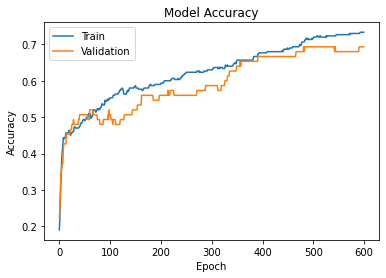

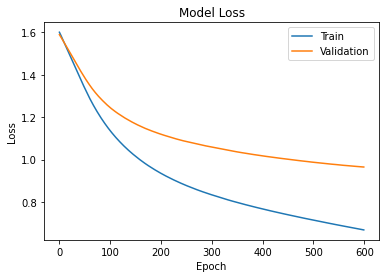

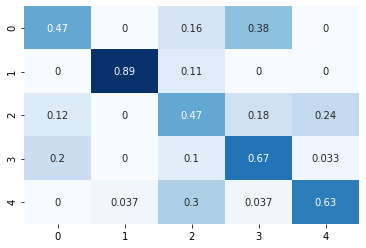

In [10]:
model.save('CNN1')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Acuracy.jpg')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss.jpg')
plt.show()
Y_pred=np.argmax(model.predict(X_test),axis=1)
Y_test2=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test2,Y_pred,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Blues',annot=True)
plt.savefig('CM.jpg')
plt.show()

In [11]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(X_train[0].shape)))
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((3, 3)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(5, activation='softmax'))

opt2 = SGD(lr=0.0005, momentum=0.9)
model2.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
steps2 = int(X_train.shape[0] / 8)
history2 = model2.fit(X_train, Y_train, shuffle=False , epochs=800, batch_size= 20, validation_split=0.2, verbose=1)
_2 , acc2 = model2.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc2 * 100.0))

Epoch 1/800
15/15 [==============================] - 1s 36ms/step - loss: 1.6085 - accuracy: 0.1755 - val_loss: 1.6055 - val_accuracy: 0.1867
Epoch 2/800
15/15 [==============================] - 0s 25ms/step - loss: 1.6017 - accuracy: 0.2351 - val_loss: 1.5991 - val_accuracy: 0.2533
Epoch 3/800
15/15 [==============================] - 0s 25ms/step - loss: 1.5935 - accuracy: 0.3565 - val_loss: 1.5929 - val_accuracy: 0.2800
Epoch 4/800
15/15 [==============================] - 0s 27ms/step - loss: 1.5858 - accuracy: 0.3968 - val_loss: 1.5874 - val_accuracy: 0.3333
Epoch 5/800
15/15 [==============================] - 0s 28ms/step - loss: 1.5786 - accuracy: 0.4545 - val_loss: 1.5821 - val_accuracy: 0.3867
Epoch 6/800
15/15 [==============================] - 0s 28ms/step - loss: 1.5715 - accuracy: 0.4652 - val_loss: 1.5770 - val_accuracy: 0.3867
Epoch 7/800
15/15 [==============================] - 0s 27ms/step - loss: 1.5648 - accuracy: 0.4743 - val_loss: 1.5722 - val_accuracy: 0.4000
Epoch 

15/15 [==============================] - 0s 28ms/step - loss: 1.0646 - accuracy: 0.5507 - val_loss: 1.1815 - val_accuracy: 0.4667
Epoch 59/800
15/15 [==============================] - 0s 27ms/step - loss: 1.0576 - accuracy: 0.5541 - val_loss: 1.1764 - val_accuracy: 0.4800
Epoch 60/800
15/15 [==============================] - 0s 28ms/step - loss: 1.0507 - accuracy: 0.5591 - val_loss: 1.1710 - val_accuracy: 0.4933
Epoch 61/800
15/15 [==============================] - 0s 25ms/step - loss: 1.0441 - accuracy: 0.5629 - val_loss: 1.1663 - val_accuracy: 0.4933
Epoch 62/800
15/15 [==============================] - 0s 25ms/step - loss: 1.0380 - accuracy: 0.5733 - val_loss: 1.1608 - val_accuracy: 0.4800
Epoch 63/800
15/15 [==============================] - 0s 27ms/step - loss: 1.0320 - accuracy: 0.5797 - val_loss: 1.1568 - val_accuracy: 0.5067
Epoch 64/800
15/15 [==============================] - 0s 28ms/step - loss: 1.0257 - accuracy: 0.5843 - val_loss: 1.1512 - val_accuracy: 0.4800
Epoch 65/800

15/15 [==============================] - 0s 26ms/step - loss: 0.8478 - accuracy: 0.6427 - val_loss: 1.0159 - val_accuracy: 0.5733
Epoch 116/800
15/15 [==============================] - 0s 24ms/step - loss: 0.8459 - accuracy: 0.6452 - val_loss: 1.0145 - val_accuracy: 0.5867
Epoch 117/800
15/15 [==============================] - 0s 28ms/step - loss: 0.8430 - accuracy: 0.6452 - val_loss: 1.0125 - val_accuracy: 0.5867
Epoch 118/800
15/15 [==============================] - 0s 26ms/step - loss: 0.8414 - accuracy: 0.6452 - val_loss: 1.0115 - val_accuracy: 0.6000
Epoch 119/800
15/15 [==============================] - 0s 27ms/step - loss: 0.8389 - accuracy: 0.6452 - val_loss: 1.0092 - val_accuracy: 0.6000
Epoch 120/800
15/15 [==============================] - 0s 25ms/step - loss: 0.8365 - accuracy: 0.6452 - val_loss: 1.0075 - val_accuracy: 0.5867
Epoch 121/800
15/15 [==============================] - 0s 24ms/step - loss: 0.8345 - accuracy: 0.6452 - val_loss: 1.0055 - val_accuracy: 0.6000
Epoch 

Epoch 172/800
15/15 [==============================] - 0s 24ms/step - loss: 0.7394 - accuracy: 0.6819 - val_loss: 0.9422 - val_accuracy: 0.6400
Epoch 173/800
15/15 [==============================] - 0s 25ms/step - loss: 0.7374 - accuracy: 0.6819 - val_loss: 0.9416 - val_accuracy: 0.6400
Epoch 174/800
15/15 [==============================] - 0s 24ms/step - loss: 0.7360 - accuracy: 0.6819 - val_loss: 0.9395 - val_accuracy: 0.6400
Epoch 175/800
15/15 [==============================] - 0s 25ms/step - loss: 0.7343 - accuracy: 0.6860 - val_loss: 0.9393 - val_accuracy: 0.6400
Epoch 176/800
15/15 [==============================] - 0s 28ms/step - loss: 0.7317 - accuracy: 0.6860 - val_loss: 0.9371 - val_accuracy: 0.6400
Epoch 177/800
15/15 [==============================] - 0s 25ms/step - loss: 0.7305 - accuracy: 0.6860 - val_loss: 0.9372 - val_accuracy: 0.6533
Epoch 178/800
15/15 [==============================] - 0s 27ms/step - loss: 0.7278 - accuracy: 0.6819 - val_loss: 0.9350 - val_accuracy:

Epoch 229/800
15/15 [==============================] - 0s 25ms/step - loss: 0.6355 - accuracy: 0.7353 - val_loss: 0.8845 - val_accuracy: 0.6400
Epoch 230/800
15/15 [==============================] - 0s 25ms/step - loss: 0.6332 - accuracy: 0.7353 - val_loss: 0.8828 - val_accuracy: 0.6400
Epoch 231/800
15/15 [==============================] - 0s 28ms/step - loss: 0.6310 - accuracy: 0.7353 - val_loss: 0.8825 - val_accuracy: 0.6400
Epoch 232/800
15/15 [==============================] - 0s 29ms/step - loss: 0.6294 - accuracy: 0.7362 - val_loss: 0.8813 - val_accuracy: 0.6400
Epoch 233/800
15/15 [==============================] - 0s 29ms/step - loss: 0.6271 - accuracy: 0.7362 - val_loss: 0.8810 - val_accuracy: 0.6400
Epoch 234/800
15/15 [==============================] - 0s 29ms/step - loss: 0.6261 - accuracy: 0.7341 - val_loss: 0.8803 - val_accuracy: 0.6400
Epoch 235/800
15/15 [==============================] - 0s 27ms/step - loss: 0.6241 - accuracy: 0.7353 - val_loss: 0.8790 - val_accuracy:

Epoch 286/800
15/15 [==============================] - 0s 27ms/step - loss: 0.5259 - accuracy: 0.7689 - val_loss: 0.8496 - val_accuracy: 0.6667
Epoch 287/800
15/15 [==============================] - 0s 25ms/step - loss: 0.5255 - accuracy: 0.7683 - val_loss: 0.8495 - val_accuracy: 0.6667
Epoch 288/800
15/15 [==============================] - 0s 25ms/step - loss: 0.5229 - accuracy: 0.7795 - val_loss: 0.8486 - val_accuracy: 0.6667
Epoch 289/800
15/15 [==============================] - 0s 26ms/step - loss: 0.5205 - accuracy: 0.7689 - val_loss: 0.8491 - val_accuracy: 0.6667
Epoch 290/800
15/15 [==============================] - 0s 25ms/step - loss: 0.5183 - accuracy: 0.7795 - val_loss: 0.8479 - val_accuracy: 0.6667
Epoch 291/800
15/15 [==============================] - 0s 26ms/step - loss: 0.5165 - accuracy: 0.7795 - val_loss: 0.8482 - val_accuracy: 0.6667
Epoch 292/800
15/15 [==============================] - 0s 29ms/step - loss: 0.5145 - accuracy: 0.7795 - val_loss: 0.8472 - val_accuracy:

Epoch 343/800
15/15 [==============================] - 0s 26ms/step - loss: 0.4150 - accuracy: 0.8893 - val_loss: 0.8558 - val_accuracy: 0.6533
Epoch 344/800
15/15 [==============================] - 0s 26ms/step - loss: 0.4134 - accuracy: 0.8902 - val_loss: 0.8544 - val_accuracy: 0.6533
Epoch 345/800
15/15 [==============================] - 0s 25ms/step - loss: 0.4121 - accuracy: 0.8902 - val_loss: 0.8542 - val_accuracy: 0.6533
Epoch 346/800
15/15 [==============================] - 0s 28ms/step - loss: 0.4094 - accuracy: 0.8902 - val_loss: 0.8556 - val_accuracy: 0.6533
Epoch 347/800
15/15 [==============================] - 0s 27ms/step - loss: 0.4071 - accuracy: 0.8923 - val_loss: 0.8547 - val_accuracy: 0.6533
Epoch 348/800
15/15 [==============================] - 0s 27ms/step - loss: 0.4049 - accuracy: 0.8902 - val_loss: 0.8557 - val_accuracy: 0.6533
Epoch 349/800
15/15 [==============================] - 0s 29ms/step - loss: 0.4041 - accuracy: 0.8902 - val_loss: 0.8578 - val_accuracy:

Epoch 400/800
15/15 [==============================] - 0s 28ms/step - loss: 0.3098 - accuracy: 0.9152 - val_loss: 0.8764 - val_accuracy: 0.6667
Epoch 401/800
15/15 [==============================] - 0s 28ms/step - loss: 0.3083 - accuracy: 0.9152 - val_loss: 0.8793 - val_accuracy: 0.6800
Epoch 402/800
15/15 [==============================] - 0s 26ms/step - loss: 0.3075 - accuracy: 0.9152 - val_loss: 0.8774 - val_accuracy: 0.6667
Epoch 403/800
15/15 [==============================] - 0s 26ms/step - loss: 0.3030 - accuracy: 0.9163 - val_loss: 0.8779 - val_accuracy: 0.6800
Epoch 404/800
15/15 [==============================] - 0s 26ms/step - loss: 0.3032 - accuracy: 0.9163 - val_loss: 0.8824 - val_accuracy: 0.6800
Epoch 405/800
15/15 [==============================] - 0s 24ms/step - loss: 0.3006 - accuracy: 0.9163 - val_loss: 0.8789 - val_accuracy: 0.6800
Epoch 406/800
15/15 [==============================] - 0s 25ms/step - loss: 0.2995 - accuracy: 0.9163 - val_loss: 0.8804 - val_accuracy:

Epoch 457/800
15/15 [==============================] - 0s 26ms/step - loss: 0.2183 - accuracy: 0.9355 - val_loss: 0.9177 - val_accuracy: 0.6667
Epoch 458/800
15/15 [==============================] - 0s 27ms/step - loss: 0.2170 - accuracy: 0.9355 - val_loss: 0.9191 - val_accuracy: 0.6667
Epoch 459/800
15/15 [==============================] - 0s 25ms/step - loss: 0.2163 - accuracy: 0.9355 - val_loss: 0.9191 - val_accuracy: 0.6667
Epoch 460/800
15/15 [==============================] - 0s 26ms/step - loss: 0.2153 - accuracy: 0.9341 - val_loss: 0.9212 - val_accuracy: 0.6667
Epoch 461/800
15/15 [==============================] - 0s 25ms/step - loss: 0.2131 - accuracy: 0.9461 - val_loss: 0.9198 - val_accuracy: 0.6667
Epoch 462/800
15/15 [==============================] - 0s 25ms/step - loss: 0.2121 - accuracy: 0.9461 - val_loss: 0.9218 - val_accuracy: 0.6667
Epoch 463/800
15/15 [==============================] - 0s 28ms/step - loss: 0.2109 - accuracy: 0.9461 - val_loss: 0.9227 - val_accuracy:

Epoch 514/800
15/15 [==============================] - 0s 26ms/step - loss: 0.1489 - accuracy: 0.9606 - val_loss: 0.9787 - val_accuracy: 0.6667
Epoch 515/800
15/15 [==============================] - 0s 25ms/step - loss: 0.1485 - accuracy: 0.9606 - val_loss: 0.9814 - val_accuracy: 0.6667
Epoch 516/800
15/15 [==============================] - 0s 26ms/step - loss: 0.1477 - accuracy: 0.9606 - val_loss: 0.9819 - val_accuracy: 0.6667
Epoch 517/800
15/15 [==============================] - 0s 28ms/step - loss: 0.1467 - accuracy: 0.9606 - val_loss: 0.9840 - val_accuracy: 0.6667
Epoch 518/800
15/15 [==============================] - 0s 27ms/step - loss: 0.1456 - accuracy: 0.9606 - val_loss: 0.9846 - val_accuracy: 0.6667
Epoch 519/800
15/15 [==============================] - 0s 26ms/step - loss: 0.1438 - accuracy: 0.9606 - val_loss: 0.9842 - val_accuracy: 0.6667
Epoch 520/800
15/15 [==============================] - 0s 27ms/step - loss: 0.1418 - accuracy: 0.9627 - val_loss: 0.9842 - val_accuracy:

Epoch 571/800
15/15 [==============================] - 0s 26ms/step - loss: 0.1001 - accuracy: 0.9845 - val_loss: 1.0557 - val_accuracy: 0.6800
Epoch 572/800
15/15 [==============================] - 0s 27ms/step - loss: 0.0986 - accuracy: 0.9838 - val_loss: 1.0558 - val_accuracy: 0.6800
Epoch 573/800
15/15 [==============================] - 0s 27ms/step - loss: 0.0978 - accuracy: 0.9919 - val_loss: 1.0576 - val_accuracy: 0.6800
Epoch 574/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0971 - accuracy: 0.9913 - val_loss: 1.0582 - val_accuracy: 0.6800
Epoch 575/800
15/15 [==============================] - 0s 29ms/step - loss: 0.0968 - accuracy: 0.9919 - val_loss: 1.0608 - val_accuracy: 0.6800
Epoch 576/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0958 - accuracy: 0.9913 - val_loss: 1.0629 - val_accuracy: 0.6800
Epoch 577/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0952 - accuracy: 0.9919 - val_loss: 1.0637 - val_accuracy:

Epoch 628/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0702 - accuracy: 0.9950 - val_loss: 1.1369 - val_accuracy: 0.6667
Epoch 629/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0698 - accuracy: 0.9950 - val_loss: 1.1391 - val_accuracy: 0.6667
Epoch 630/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0695 - accuracy: 0.9950 - val_loss: 1.1399 - val_accuracy: 0.6667
Epoch 631/800
15/15 [==============================] - 0s 28ms/step - loss: 0.0686 - accuracy: 0.9950 - val_loss: 1.1405 - val_accuracy: 0.6800
Epoch 632/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0680 - accuracy: 0.9944 - val_loss: 1.1445 - val_accuracy: 0.6667
Epoch 633/800
15/15 [==============================] - 0s 27ms/step - loss: 0.0682 - accuracy: 0.9944 - val_loss: 1.1444 - val_accuracy: 0.6667
Epoch 634/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0680 - accuracy: 0.9950 - val_loss: 1.1460 - val_accuracy:

Epoch 685/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0514 - accuracy: 0.9962 - val_loss: 1.2181 - val_accuracy: 0.6933
Epoch 686/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0511 - accuracy: 0.9962 - val_loss: 1.2189 - val_accuracy: 0.6933
Epoch 687/800
15/15 [==============================] - 0s 27ms/step - loss: 0.0507 - accuracy: 0.9962 - val_loss: 1.2203 - val_accuracy: 0.6933
Epoch 688/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0505 - accuracy: 0.9962 - val_loss: 1.2216 - val_accuracy: 0.6933
Epoch 689/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0503 - accuracy: 0.9962 - val_loss: 1.2204 - val_accuracy: 0.6800
Epoch 690/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0500 - accuracy: 0.9962 - val_loss: 1.2241 - val_accuracy: 0.6933
Epoch 691/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0497 - accuracy: 0.9962 - val_loss: 1.2253 - val_accuracy:

Epoch 742/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0387 - accuracy: 0.9962 - val_loss: 1.2887 - val_accuracy: 0.7067
Epoch 743/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0385 - accuracy: 0.9962 - val_loss: 1.2898 - val_accuracy: 0.7067
Epoch 744/800
15/15 [==============================] - 0s 24ms/step - loss: 0.0384 - accuracy: 0.9962 - val_loss: 1.2916 - val_accuracy: 0.7067
Epoch 745/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0382 - accuracy: 0.9962 - val_loss: 1.2903 - val_accuracy: 0.7067
Epoch 746/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0381 - accuracy: 0.9979 - val_loss: 1.2918 - val_accuracy: 0.7067
Epoch 747/800
15/15 [==============================] - 0s 25ms/step - loss: 0.0378 - accuracy: 0.9962 - val_loss: 1.2958 - val_accuracy: 0.7067
Epoch 748/800
15/15 [==============================] - 0s 27ms/step - loss: 0.0376 - accuracy: 0.9962 - val_loss: 1.2956 - val_accuracy:

Epoch 799/800
15/15 [==============================] - 0s 26ms/step - loss: 0.0300 - accuracy: 0.9979 - val_loss: 1.3596 - val_accuracy: 0.6933
Epoch 800/800
15/15 [==============================] - 0s 29ms/step - loss: 0.0299 - accuracy: 0.9979 - val_loss: 1.3593 - val_accuracy: 0.6933
> 65.600


INFO:tensorflow:Assets written to: CNN2\assets


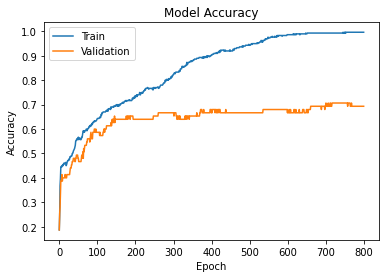

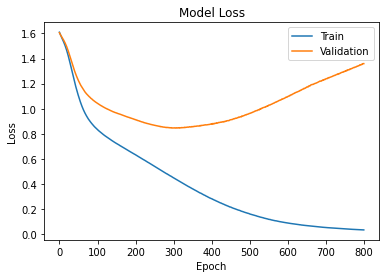

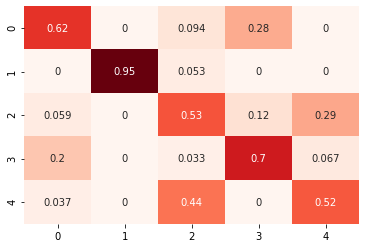

In [13]:
model2.save('CNN2')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Acuracy2.jpg')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss2.jpg')
plt.show()
Y_pred2=np.argmax(model2.predict(X_test),axis=1)
Y_test2=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test2,Y_pred2,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Reds',annot=True)
plt.savefig('CM2.jpg')
plt.show()

In [20]:
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(X_train[0].shape)))
model3.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((3, 3)))
model3.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((3, 3)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(5, activation='softmax'))

opt3 = SGD(lr=0.0007, momentum=0.9)
model3.compile(optimizer=opt3, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
steps3 = int(X_train.shape[0] / 8)
history3 = model3.fit(X_train, Y_train, shuffle=False , epochs=150, batch_size= 10, validation_split=0.2, verbose=1)
_3 , acc3 = model3.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc3 * 100.0))

Epoch 1/150
30/30 [==============================] - 1s 26ms/step - loss: 1.6109 - accuracy: 0.2153 - val_loss: 1.6010 - val_accuracy: 0.1867
Epoch 2/150
30/30 [==============================] - 1s 23ms/step - loss: 1.5912 - accuracy: 0.1963 - val_loss: 1.5819 - val_accuracy: 0.2133
Epoch 3/150
30/30 [==============================] - 1s 23ms/step - loss: 1.5727 - accuracy: 0.3705 - val_loss: 1.5662 - val_accuracy: 0.3333
Epoch 4/150
30/30 [==============================] - 1s 22ms/step - loss: 1.5542 - accuracy: 0.4803 - val_loss: 1.5488 - val_accuracy: 0.3733
Epoch 5/150
30/30 [==============================] - 1s 22ms/step - loss: 1.5325 - accuracy: 0.5048 - val_loss: 1.5249 - val_accuracy: 0.4400
Epoch 6/150
30/30 [==============================] - 1s 22ms/step - loss: 1.5058 - accuracy: 0.4932 - val_loss: 1.4954 - val_accuracy: 0.4267
Epoch 7/150
30/30 [==============================] - 1s 21ms/step - loss: 1.4722 - accuracy: 0.4955 - val_loss: 1.4589 - val_accuracy: 0.4267
Epoch 

30/30 [==============================] - 1s 22ms/step - loss: 0.5427 - accuracy: 0.7770 - val_loss: 0.7015 - val_accuracy: 0.6533
Epoch 59/150
30/30 [==============================] - 1s 22ms/step - loss: 0.5340 - accuracy: 0.7868 - val_loss: 0.6994 - val_accuracy: 0.6400
Epoch 60/150
30/30 [==============================] - 1s 22ms/step - loss: 0.5307 - accuracy: 0.7831 - val_loss: 0.6955 - val_accuracy: 0.6667
Epoch 61/150
30/30 [==============================] - 1s 22ms/step - loss: 0.5217 - accuracy: 0.7925 - val_loss: 0.6956 - val_accuracy: 0.6533
Epoch 62/150
30/30 [==============================] - 1s 22ms/step - loss: 0.5116 - accuracy: 0.7935 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 63/150
30/30 [==============================] - 1s 22ms/step - loss: 0.5040 - accuracy: 0.8065 - val_loss: 0.6884 - val_accuracy: 0.6533
Epoch 64/150
30/30 [==============================] - 1s 23ms/step - loss: 0.4960 - accuracy: 0.7984 - val_loss: 0.6807 - val_accuracy: 0.6800
Epoch 65/150

30/30 [==============================] - 1s 23ms/step - loss: 0.2475 - accuracy: 0.9150 - val_loss: 0.7281 - val_accuracy: 0.6533
Epoch 116/150
30/30 [==============================] - 1s 22ms/step - loss: 0.2407 - accuracy: 0.9079 - val_loss: 0.7454 - val_accuracy: 0.6533
Epoch 117/150
30/30 [==============================] - 1s 22ms/step - loss: 0.2321 - accuracy: 0.9119 - val_loss: 0.7449 - val_accuracy: 0.6533
Epoch 118/150
30/30 [==============================] - 1s 22ms/step - loss: 0.2244 - accuracy: 0.9132 - val_loss: 0.7438 - val_accuracy: 0.6533
Epoch 119/150
30/30 [==============================] - 1s 22ms/step - loss: 0.2182 - accuracy: 0.9183 - val_loss: 0.7487 - val_accuracy: 0.6533
Epoch 120/150
30/30 [==============================] - 1s 21ms/step - loss: 0.2134 - accuracy: 0.9230 - val_loss: 0.7522 - val_accuracy: 0.6533
Epoch 121/150
30/30 [==============================] - 1s 23ms/step - loss: 0.2074 - accuracy: 0.9230 - val_loss: 0.7653 - val_accuracy: 0.6533
Epoch 

INFO:tensorflow:Assets written to: CNN3\assets


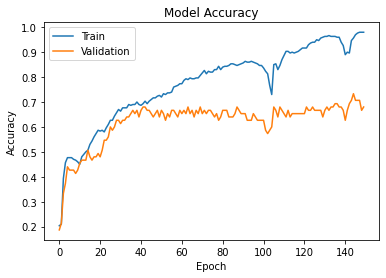

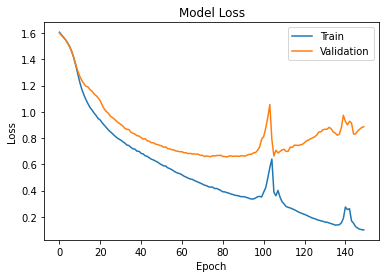

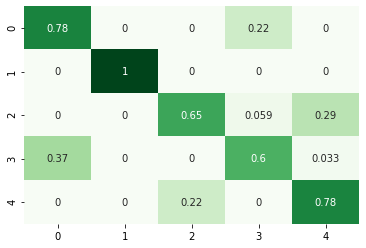

In [22]:
model3.save('CNN3')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Acuracy3.jpg')
plt.show()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss3.jpg')
plt.show()
Y_pred3=np.argmax(model3.predict(X_test),axis=1)
Y_test3=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test3,Y_pred3,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Greens',annot=True)
plt.savefig('CM3.jpg')
plt.show()